In [1]:
"""Pavan's Version of the SGOOP tutorial with elimination of noisy parameters and then self-consistency check"""
import sgoop
import scipy.optimize as opt
import numpy as np
import time
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
def opti_func(rc):
    global nfev
    nfev +=1
    return -sgoop.rc_eval(rc)

In [3]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [4]:
def find_wells(prob):
    
    energy = []
    for i in (range(len(prob))):
        if prob[i] == 0:
            energy.append(np.inf)
        else:
            energy.append(-1 * np.log(prob[i]))
    
    wells = 0
    max = np.inf
    min = np.inf
    d = 1
    i = 0
    for x in energy:
        if x > max:
            max = x
            if (max - min > 1):
                min = x
                d = 1
        elif x < min:
            min = x
            if (max - min > 1):
                if d == 1:
                    wells = wells + 1
                max = x
                d = -1
        i = i + 1
    
    return wells

In [5]:
def initial_guess(wells):
    
    x = [-1, -1, -1, -1, -1, -1, -1, -1]
    rc = x
    max_val = 0
    sgoop.wells = wells
    
    while not x == [1, 1, 1, 1, 1, 1, 1, 1]:
        
        tmp = sgoop.rc_eval(x)
        if tmp > max_val:
            max_val = tmp
            rc = x.copy()
            
        for i in range(8):
            if x[7 - i] == -1:
                x[7 - i] = 1
                break;
            else:
                x[7 - i] = -1
                
    tmp = sgoop.rc_eval(x)
    if tmp > max_val:
        max_val = tmp
        rc = x.copy()
        
    return rc

In [6]:
# Calculating the optimal 2 well RC.
consistent = True
candidate_wells = 1

while (consistent == True):
    
    print("Testing " + str(candidate_wells) + " wells")
    
    guess = initial_guess(candidate_wells)
    
    sgoop.wells = candidate_wells
    start = time.time()
    last = start
    lastf = nfev = 0
    minimizer_kwargs = {"options": {"maxiter":10}}
    ret = opt.basinhopping(opti_func,guess,niter=100,T=.01,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
    end = time.time()
    print(end-start)
    prob_space = sgoop.md_prob(ret.x)
    
    if (find_wells(prob_space) >= candidate_wells):
        print(str(candidate_wells) + " well runs accepted. Testing " + str(candidate_wells + 1) + " well RC.")
        rc = ret.x.copy()
        candidate_wells = candidate_wells + 1
    else:
        print(str(candidate_wells) + " well runs failed. Reverting to previous RC.")
        consistent = False
        
    print()

rc



Testing 1 wells
[-1.052 -0.932 -0.976 -1.028 -1.053 -0.915  1.081  1.023] with spectral gap 0.0311 accepted after  20 runs (0.128)
[-1.135 -0.968 -0.981 -1.082 -1.139 -0.862  1.020  1.066] with spectral gap 0.0287 accepted after  10 runs (0.065)
[-1.040 -0.982 -0.958 -1.043 -1.133 -0.886  1.038  1.150] with spectral gap 0.0284 accepted after  10 runs (0.068)
[-1.053 -1.046 -0.926 -1.100 -1.150 -0.900  1.008  1.148] with spectral gap 0.0274 accepted after  10 runs (0.068)
[-1.017 -1.110 -0.885 -1.166 -1.105 -0.870  0.943  1.200] with spectral gap 0.0254 accepted after  10 runs (0.071)
[-1.070 -1.045 -0.935 -1.226 -1.172 -0.784  0.940  1.222] with spectral gap 0.0242 accepted after  10 runs (0.070)
[-1.165 -1.108 -1.025 -1.173 -1.167 -0.852  0.980  1.284] with spectral gap 0.0272 accepted after  10 runs (0.066)
[-1.228 -1.122 -1.100 -1.148 -1.223 -0.853  0.929  1.341] with spectral gap 0.0203 declined after  10 runs (0.070)
[-1.204 -1.153 -1.088 -1.214 -1.150 -0.880  1.065  1.372] with s

[-0.888 -0.954 -1.672 -1.718 -1.516 -0.741  1.130  1.537] with spectral gap 0.0195 accepted after  10 runs (0.072)
[-0.950 -0.988 -1.745 -1.763 -1.544 -0.710  1.184  1.460] with spectral gap 0.0193 accepted after  10 runs (0.072)
[-0.965 -1.051 -1.844 -1.709 -1.488 -0.601  1.138  1.472] with spectral gap 0.0190 accepted after  10 runs (0.067)
[-1.059 -1.104 -1.779 -1.643 -1.593 -0.558  1.183  1.467] with spectral gap 0.0176 accepted after  10 runs (0.071)
[-0.990 -1.214 -1.778 -1.719 -1.701 -0.517  1.110  1.386] with spectral gap 0.0175 accepted after  10 runs (0.065)
[-0.965 -1.149 -1.870 -1.768 -1.701 -0.466  1.208  1.299] with spectral gap 0.0189 accepted after  10 runs (0.068)
[-1.063 -1.066 -1.906 -1.775 -1.669 -0.529  1.270  1.337] with spectral gap 0.0186 accepted after  10 runs (0.067)
[-1.162 -1.064 -1.960 -1.847 -1.667 -0.605  1.381  1.286] with spectral gap 0.0191 accepted after  10 runs (0.066)
[-1.249 -1.009 -1.976 -1.877 -1.629 -0.692  1.439  1.207] with spectral gap 0.02

[-1.192  0.899  1.573  1.004  0.944 -1.006  0.983  1.277] with spectral gap 0.0500 accepted after  10 runs (0.067)
[-1.285  0.947  1.596  0.915  0.976 -1.039  1.008  1.345] with spectral gap 0.0483 accepted after  10 runs (0.067)
[-1.310  1.010  1.583  0.851  0.977 -1.101  0.962  1.384] with spectral gap 0.0484 accepted after  10 runs (0.073)
[-1.386  1.026  1.646  0.934  0.948 -1.178  1.018  1.305] with spectral gap 0.0488 accepted after  10 runs (0.066)
[-1.390  0.938  1.651  1.028  0.991 -1.140  1.032  1.400] with spectral gap 0.0487 accepted after  10 runs (0.068)
[-1.362  0.909  1.594  0.954  0.916 -1.033  0.946  1.462] with spectral gap 0.0491 accepted after  10 runs (0.065)
[-1.356  0.834  1.638  1.016  0.844 -0.932  0.874  1.490] with spectral gap 0.0492 accepted after  10 runs (0.067)
[-1.466  0.830  1.564  0.911  0.765 -1.013  0.922  1.535] with spectral gap 0.0474 accepted after  10 runs (0.074)
[-1.412  0.729  1.508  0.974  0.780 -0.980  0.851  1.486] with spectral gap 0.05

array([-1.052, -0.932, -0.976, -1.028, -1.053, -0.915,  1.081,  1.023])

[-1.052 -0.932 -0.976 -1.028 -1.053 -0.915  1.081  1.023]
1


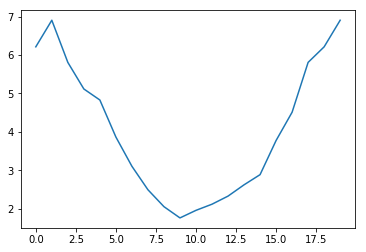

In [8]:
# Graphing the optimal RC with the most wells
p=sgoop.md_prob(rc)
plt.plot(-np.ma.log(p))
print(rc)
print(str(candidate_wells - 1))